<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/422021618056_safwa_alifiyah_PRAKTIKUM_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
UAS = pd.read_csv('/content/BankNote_Authentication.csv')
UAS.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
UAS.shape

(1372, 5)

In [ ]:
UAS.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [ ]:
UAS.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [ ]:
UAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
UAS.isna().values.any()

False

In [ ]:
UAS[UAS.duplicated()]

,variance,skewness,curtosis,entropy,class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


In [ ]:
UAS.duplicated().value_counts()

False    39588
dtype: int64

In [ ]:
UAS.drop_duplicates(inplace=True)
UAS.shape

(1348, 5)

In [ ]:
UAS.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
UAS.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
X = UAS.drop(columns='class')
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y = UAS['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_train.shape)
print(y_train.shape)

training dataset
(808, 4)
(808,)

testing dataset:
(808, 4)
(808,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(X_train, y_train)
  y_pred = model_knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

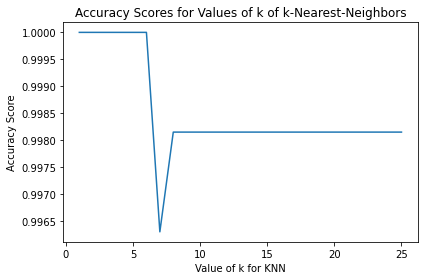

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[288   0]
 [  0 252]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       252

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9944444444444445


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[286   2]
 [  1 251]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       288
           1       0.99      1.00      0.99       252

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt]
accuracy_scores = []
for model in models:
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)


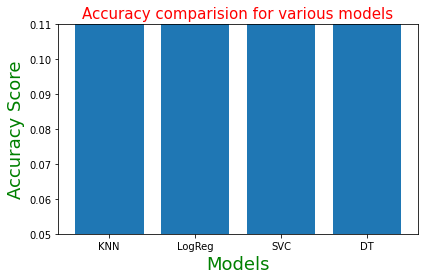

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT'],accuracy_scores)
plt.ylim(0.05,0.11)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()